In [6]:
import keras
mnist = keras.datasets.mnist
# Load data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

nsamples, nx, ny = x_train.shape
x_train_2d = x_train.reshape((nsamples,nx*ny))

nsamples1, nx1, ny1 = x_test.shape
x_test_2d = x_test.reshape((nsamples1,nx1*ny1))


In [7]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,verbose=1, perplexity=40, n_iter=300).fit_transform(x_train_2d)
X_embedded.shape

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 17.623s...
[t-SNE] Computed neighbors for 60000 samples in 3990.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities fo

(60000, 2)

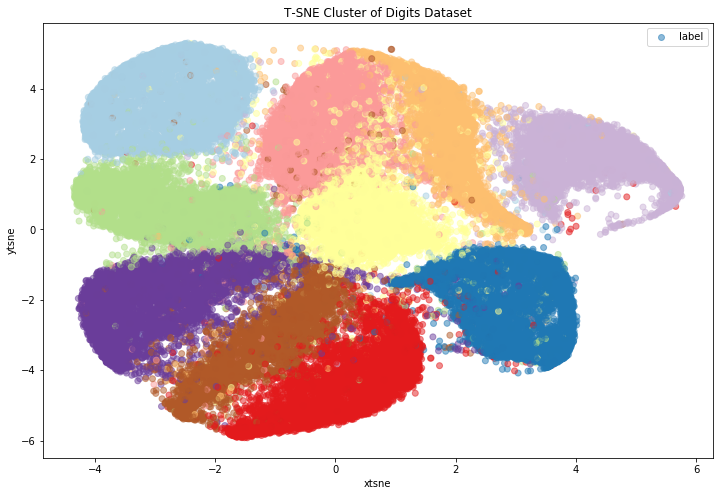

In [33]:
plt.figure(figsize= (12,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = y_train, cmap = 'Paired', label = 'label',alpha = 0.5)
plt.xlabel('xtsne')
plt.ylabel('ytsne')
plt.title('T-SNE Cluster of Digits Dataset')
plt.legend()
plt.show()

In [39]:
import pandas as pd
xy = np.hstack((X_embedded, y_train.reshape(-1,1)))
xy = pd.DataFrame(xy, columns= ['x1','x2','label'])
xy.label = xy.label.astype(int)

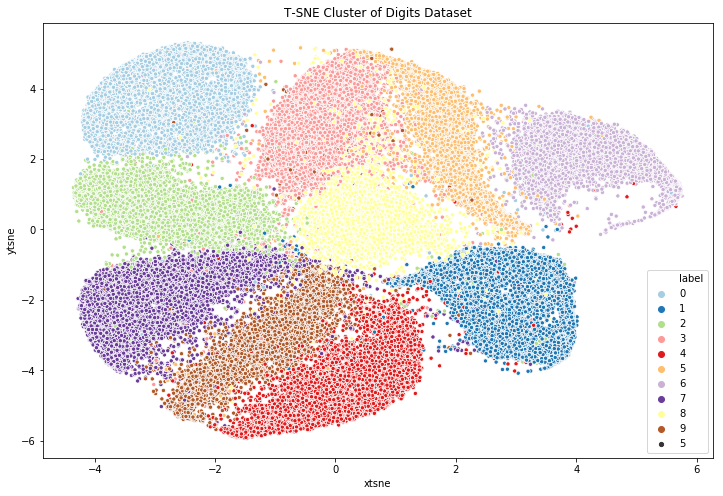

In [45]:
import seaborn as sns
plt.figure(figsize= (12,8))
facet = sns.scatterplot(data=xy, x='x1', y='x2', hue='label', 
                   legend='full',size = 5, palette="Paired",)
plt.xlabel('xtsne')
plt.ylabel('ytsne')
plt.title('T-SNE Cluster of Digits Dataset')
plt.show()

In [23]:
xy = np.hstack((X_embedded, y_train.reshape(-1,1)))

In [19]:
sns.scatterplot


(60000, 2)

In [24]:
xy

array([[ 1.8567445 ,  2.4992166 ,  5.        ],
       [-3.151457  ,  3.0943263 ,  0.        ],
       [-0.94820184, -5.651456  ,  4.        ],
       ...,
       [ 1.8659331 ,  2.4086058 ,  5.        ],
       [ 3.5455146 ,  2.4293284 ,  6.        ],
       [ 0.90866935, -0.77602124,  8.        ]], dtype=float32)

# Assignment 3 - Supervised Learning

## *Zhuangdie Alan Zhou*
Netid:  *zz161*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a)
The likelihood function of the data that we will wish to maximize is as below:

$P(y|X) = \prod_{i=1}^{N}P(y_i|x_i) = \prod_{i=1}^{N}\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_{i}}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]^{(1-y_{i})}$ 




(b) The cost function of the model is as below:

$C\mathbf{w}\\
= -log\{\prod_{i=1}^{N}\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_{i}}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]^{(1-y_{i})}\}\\
= -\sum_{i=1}^{N}{log\{\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_{i}}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]^{(1-y_{i})}\}}\\
= -\sum_{i=1}^{N}\{{{y_{i}log[\sigma(\mathbf{w}^T \mathbf{x}_i)]}+(1-y_{i})log[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]\}}
$

(c)

$\\~\\
\frac{\partial C}{\partial w_0}\\
=\sum_{i=1}^{N}{{-y_{i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]x_{i}^{(0)}}}+\sum_{i=1}^{N}{(1-y_{i})\sigma(\mathbf{w}^T \mathbf{x}_i)x_{i}^{(0)}}\\
=x_{i}^{(0)}[\sum_{i=1}^{N}{{-y_{i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]}}+\sum_{i=1}^{N}{(1-y_{i})\sigma(\mathbf{w}^T \mathbf{x}_i)}]\\
=\sum_{i=1}^{N}[\sigma(\mathbf{w}^T \mathbf{x}_i)-y_{i}]x_{i}^{(0)}\\
\\~\\
\frac{\partial C}{\partial w_1}\\
=\sum_{i=1}^{N}{{-y_{i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]x_{i}^{(1)}}}+\sum_{i=1}^{N}{(1-y_{i})\sigma(\mathbf{w}^T \mathbf{x}_i)x_{i}^{(1)}}\\
=x_{i}^{(1)}[\sum_{i=1}^{N}{{-y_{i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]}}+\sum_{i=1}^{N}{(1-y_{i})\sigma(\mathbf{w}^T \mathbf{x}_i)}]\\
=\sum_{i=1}^{N}[\sigma(\mathbf{w}^T \mathbf{x}_i)-y_{i}]x_{i}^{(1)}\\
\\~\\
\frac{\partial C}{\partial w_2}\\
=\sum_{i=1}^{N}{{-y_{i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]x_{i}^{(2)}}}+\sum_{i=1}^{N}{(1-y_{i})\sigma(\mathbf{w}^T \mathbf{x}_i)x_{i}^{(2)}}\\
=x_{i}^{(2)}[\sum_{i=1}^{N}{{-y_{i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]}}+\sum_{i=1}^{N}{(1-y_{i})\sigma(\mathbf{w}^T \mathbf{x}_i)}]\\
=\sum_{i=1}^{N}[\sigma(\mathbf{w}^T \mathbf{x}_i)-y_{i}]x_{i}^{(2)}\\
$



(d)

$[w_0, w_1, w_2] = [w_0, w_1, w_2] - \eta\left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$


(e)

In [9]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
data = pd.read_csv('data/A3_Q1_data.csv')

In [39]:
data.head()

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


Text(0, 0.5, 'x2')

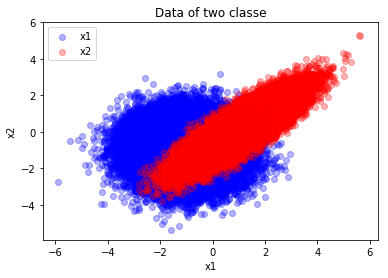

In [9]:
fig, ax = plt.subplots()
ax.scatter(data.x1[data.y ==1], data.x2[data.y ==1], c = 'blue', label = 'x1',edgecolors=None, alpha = 0.3)
ax.scatter(data.x1[data.y ==0], data.x2[data.y ==0], c = 'red', label = 'x2',edgecolors=None,alpha = 0.3)
ax.legend()
ax.set_title('Data of two classe')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

No the data is not separable, there are no hyperplanes that can perfectly seperate the data.

Logistic regression might be a good choice because if the data is linearly separable, maximum likelihood estimation for logistic regression can break down.

(f)

In [41]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [42]:
data.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


No there is no missing data and scaling problem with this dataset. If there is missing value, df.dropna() can be used to remove all the rows containing missing values. Normalizing the dataframe can remediate scaling problem.

(g)

In [43]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(data,test_size = 0.3,random_state = 409)

In [44]:
trainx = training[['x1', 'x2']].values
trainy = training['y'].values

In [30]:
def logitRegression(w, x):
    '''Implement of logistic regression'''
    xnew = np.hstack((np.ones(shape=(len(x),1)),x))
    py = np.exp(xnew@w.T)/(1+np.exp(xnew@w.T))
    return py

In [46]:
np.random.seed(409)
w = np.random.rand(3)
logitRegression(w, trainx)

array([0.3510151 , 0.46826534, 0.75618808, ..., 0.41590436, 0.83387196,
       0.71239582])

(h)

In [25]:
def costFunction(w, x, y):
    '''Return the result of cost function of Logistic Regression'''
    cost = y@np.log(logitRegression(w, x)).T + (1-y)@np.log((1-logitRegression(w, x))).T
    return -float(cost)

(i)

In [26]:
def gradDescent(w, x, y ,eta):
    '''Run gradient descent on training data'''
    xnew = np.hstack((np.ones(shape=(len(x),1)),x))
    norm1 = np.sqrt(w.T@w)
    norm0 = 0
    W = w
    while abs(norm1 - norm0)>1e-06:
        for i in range(3):
            wi = (logitRegression(w, x) - y)@xnew[:,i]
            W[i] = W[i] - eta*wi
        w = W
        norm0 = norm1
        norm1 = np.sqrt(w.T@w)
    return w
        

In [49]:
np.random.seed(409)
w = np.random.rand(3)
gradDescent(w, trainx, trainy , 0.0001)

array([-0.1850008 , -1.92088311, -0.41819043])

(j)

In [50]:
def costeachWeight(w, x, y ,eta):
    '''Run gradient descent on training data'''
    xnew = np.hstack((np.ones(shape=(len(x),1)),x))
    W = w
    norm1 = np.sqrt(w.T@w)
    norm0 = 0
    allcost = []
    while abs(norm1 - norm0)>1e-06:
        for i in range(3):
            wi = np.dot((logitRegression(w, x) - y),xnew[:,i])
            W[i] = W[i] - eta*wi
        w = W
        norm0 = norm1
        norm1 = np.sqrt(w.T@w)
        cost = costFunction(w, x, y)
        allcost.append(cost)
    return allcost

In [51]:
testx = test[['x1', 'x2']].values
testy = test['y'].values

In [52]:
np.random.seed(409)
w = np.random.rand(3)
traincost = costeachWeight(w, trainx, trainy , 0.00001)
testcost = costeachWeight(w, testx, testy , 0.00001)

Text(0, 0.5, 'Cost function')

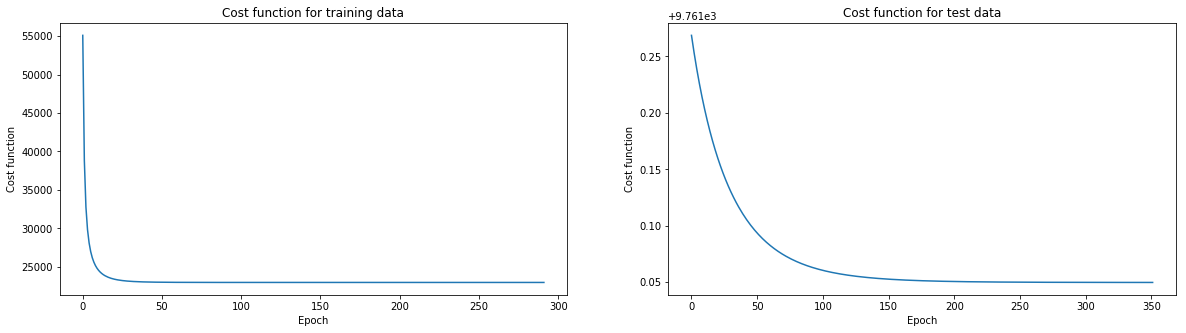

In [53]:
fig, axs = plt.subplots(1,2,figsize = (20,5))

ax = axs[0]
ax.plot(traincost)
ax.set_title('Cost function for training data')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cost function')

ax = axs[1]
ax.plot(testcost)
ax.set_title('Cost function for test data')
ax.set_xlabel('Epoch')
ax.set_ylabel('Cost function')

(k)

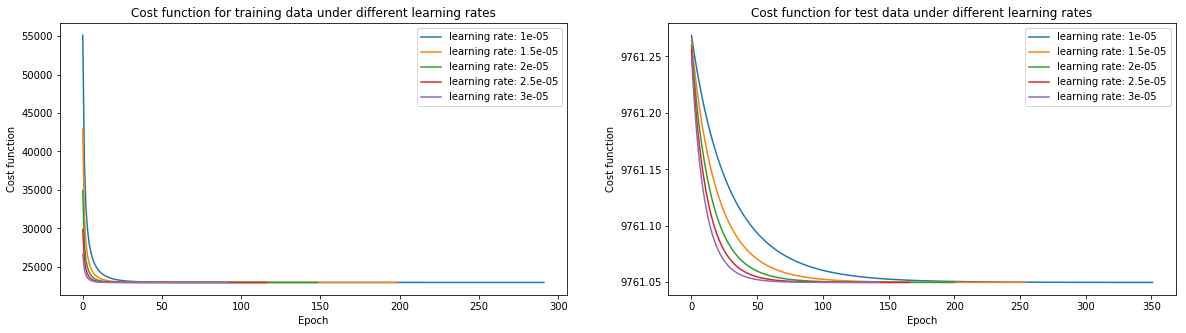

In [54]:
etalist = [0.00001,0.000015,0.00002,0.000025,0.00003]
fig, axs1 = plt.subplots(1,2,figsize = (20,5))
ax1 = axs1[0]
ax1.set_title('Cost function for training data under different learning rates')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Cost function')

ax2 = axs1[1]
ax2.set_title('Cost function for test data under different learning rates')
ax2.set_ybound(1000,10000)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Cost function')
ax2.ticklabel_format(useOffset=False)
for i in etalist:
    np.random.seed(409)
    w = np.random.rand(3)
    traincost1 = np.array(costeachWeight(w, trainx, trainy ,i))
    testcost1 = np.array(costeachWeight(w, testx, testy ,i))
    ax1.plot(traincost1,label='learning rate: {}'.format(i))
    ax2.plot(testcost1,label='learning rate: {}'.format(i))
    ax1.legend()
    ax2.legend()

From the two plots above, we can see that when learning rate goes up, the decreasing speed of the cost function goes up too, but the eventual cost function is not influenced by the learning rate.

I will choose 0.00003 as my learning rate as it decreases the cost function the fastest.

(l)

In [27]:
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn import metrics
def cvpredict(trainx, trainy, folds, w, eta):
    '''Plot ROC curve with Kfolds Validation'''
    skf = SKF(n_splits=folds, shuffle=True, random_state= 409)
    skf.get_n_splits(trainx, trainy)
    prediction_scores = np.empty(trainy.shape[0],dtype='object')
    for train_index, valid_index in skf.split(trainx, trainy):
        X_train, X_valid =trainx[train_index], trainx[valid_index]
        y_train, y_valid = trainy[train_index], trainy[valid_index]
        weight = gradDescent(w, X_train, y_train ,eta)
        yhat = logitRegression(weight, X_valid)
        prediction_scores[valid_index] = yhat
    return prediction_scores

In [28]:
def plot_roc(labels, prediction_scores):
    plt.figure(figsize=(12,8))
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and AUC')
    plt.grid('on')
    plt.axis('square')
    plt.legend(loc =4)
    plt.tight_layout()
    plt.show()

In [117]:
prediction_scores = cvpredict(trainx, trainy, 10, w, 0.00003)

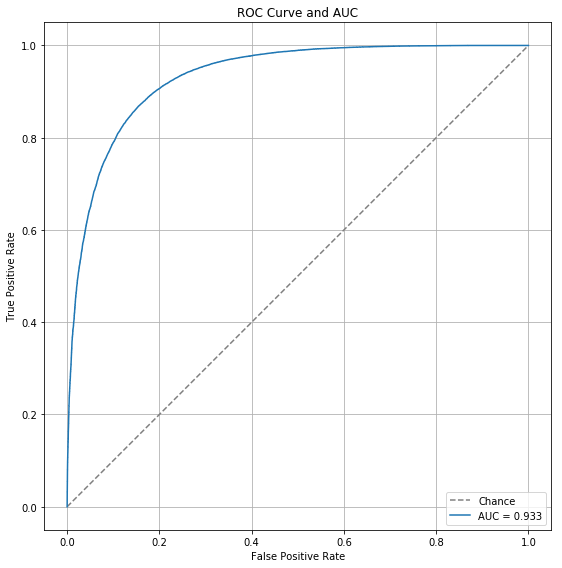

In [137]:
plot_roc(trainy, prediction_scores)

(m)

We use training data to learn model parameters and test data to evaluate genelization performances. But we cannot use test data while fitting the model because test data cannot affect any step of the learning process. We need to seperate the training data into training and validation data and learn hyperparameters using validation data.

(n)

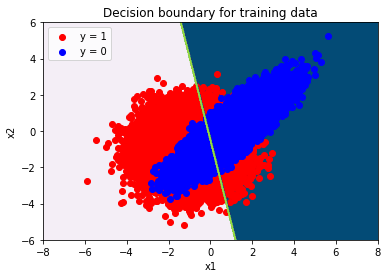

In [124]:
x1 = np.linspace(-8,8,500)
x2 = np.linspace(-6,6,500)
x1mesh, x2mesh = np.meshgrid(x1,x2)
xmesh = np.column_stack((x1mesh.ravel(),x2mesh.ravel()))
np.random.seed(409)
w = np.random.rand(3)
weight = gradDescent(w, trainx, trainy , 0.0001)
ymesh = logitRegression(weight, xmesh)
ymesh = np.where(ymesh>0.5,1,0)
ymesh = ymesh.reshape(500,500)
plt.contourf(x1mesh,x2mesh,ymesh,cmap=plt.cm.PuBu_r)
plt.contour(x1mesh,x2mesh,ymesh)
plt.scatter(training['x1'][training['y'] == 1],training['x2'][training['y'] == 1],c = 'red',label = 'y = 1')
plt.scatter(training['x1'][training['y'] == 0],training['x2'][training['y'] == 0],c = 'blue',label = 'y = 0')
plt.title('Decision boundary for training data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

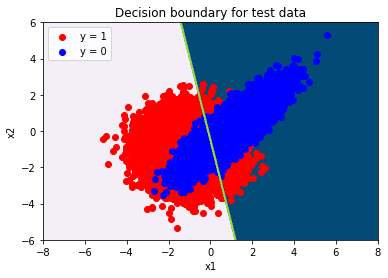

In [125]:
x1 = np.linspace(-8,8,500)
x2 = np.linspace(-6,6,500)
x1mesh, x2mesh = np.meshgrid(x1,x2)
xmesh = np.column_stack((x1mesh.ravel(),x2mesh.ravel()))
np.random.seed(409)
w = np.random.rand(3)
weight = gradDescent(w, trainx, trainy , 0.0001)
ymesh = logitRegression(weight, xmesh)
ymesh = np.where(ymesh>0.5,1,0)
ymesh = ymesh.reshape(500,500)
plt.contourf(x1mesh,x2mesh,ymesh,cmap=plt.cm.PuBu_r)
plt.contour(x1mesh,x2mesh,ymesh)
plt.scatter(test['x1'][test['y'] == 1],test['x2'][test['y'] == 1],c = 'red',label = 'y = 1')
plt.scatter(test['x1'][test['y'] == 0],test['x2'][test['y'] == 0],c = 'blue',label = 'y = 0')
plt.title('Decision boundary for test data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

(o)

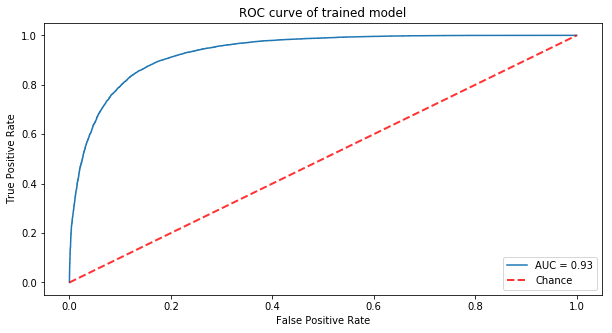

In [126]:
plt.figure(figsize=(10,5))
np.random.seed(409)
w = np.random.rand(3)
weight = gradDescent(w, trainx, trainy , 0.0001)
yhat = logitRegression(weight, testx)
fpr, tpr, thresholds = metrics.roc_curve(testy, yhat, pos_label=1)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of trained model')
plt.legend(loc = 4)

The area my model achieved under the curve is  0.93. Compared to random guess, my model is doing a great job.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

(a)

In [11]:
import keras
mnist = keras.datasets.mnist
# Load data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [12]:
y_train[np.where(y_train !=3)] = 0
y_train[np.where(y_train ==3)] = 1

y_test[np.where(y_test !=3)] = 0
y_test[np.where(y_test ==3)] = 1

(b)

10 examples from class 0:

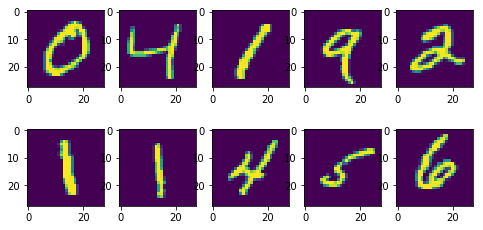

In [14]:
fig=plt.figure(figsize=(8, 4))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = x_train[np.where(y_train == 0)][i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

10 examples from class 1:

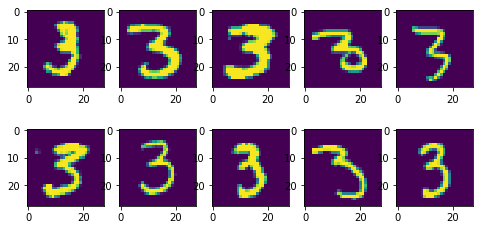

In [66]:
fig=plt.figure(figsize=(8, 4))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = x_train[np.where(y_train == 1)][i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

(c)

In [15]:
np.where(y_train == 0)[0].shape

(53869,)

In [16]:
np.where(y_train == 1)[0].shape

(6131,)

53869 samples are in class 0, 6131 samples are in class 1. The classes are not balanced. When classes are not balanced, the minority class might be ignored when the model is learning, thus the accuracy of the classifier will be affected.

(d)

I am using random forest as my classifier.

In [17]:
nsamples, nx, ny = x_train.shape
x_train_2d = x_train.reshape((nsamples,nx*ny))

nsamples1, nx1, ny1 = x_test.shape
x_test_2d = x_test.reshape((nsamples1,nx1*ny1))

Cross validation:

In [86]:
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
def rFpredict(trainx, trainy, folds):
    '''Plot ROC curve with Kfolds Validation'''
    skf = SKF(n_splits=folds, shuffle=True, random_state= 409)
    skf.get_n_splits(trainx, trainy)
    plt.figure(figsize=(12,8))
    prediction_scores = np.empty(trainy.shape[0],dtype='object')
    for train_index, valid_index in skf.split(trainx, trainy):
        X_train1, X_valid1 =trainx[train_index], trainx[valid_index]
        y_train1, y_valid1 = trainy[train_index], trainy[valid_index]
        rFmodel =  RandomForestRegressor(n_estimators = 100, random_state = 42,max_depth = 5, min_samples_split = 2)
        rFmodel.fit(X_train1, y_train1)
        yhat = rFmodel.predict(X_valid1)
        prediction_scores[valid_index] = yhat
    return prediction_scores

ROC curves for cross validation:

In [87]:
%%time
predictrandomF = rFpredict(x_train_2d, y_train,5)

CPU times: user 18min 45s, sys: 1.86 s, total: 18min 47s
Wall time: 20min 6s


<Figure size 864x576 with 0 Axes>

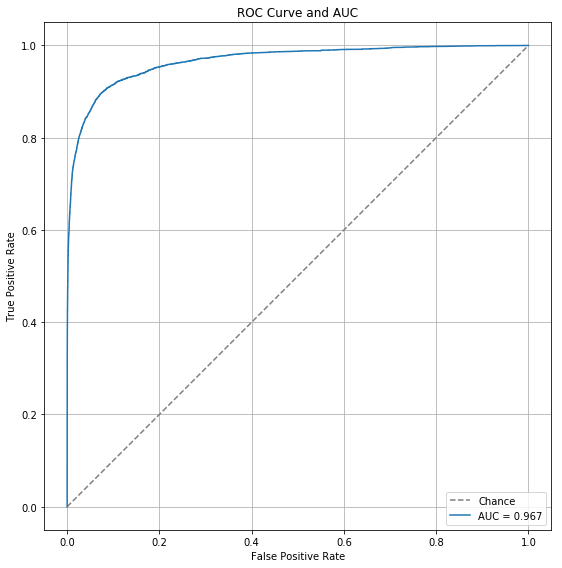

In [138]:
plot_roc(y_train, predictrandomF)

The cross validation shows the model is doing a god job.

In [20]:
rFmodel =  RandomForestRegressor(n_estimators = 100, random_state = 42,max_depth = 5, min_samples_split = 2)
rFmodel.fit(x_train_2d, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
predict1 = rFmodel.predict(x_test_2d)
predict2 = np.random.randint(2, size = x_test_2d.shape[0])
predict3 = np.random.randint(0,1, size = x_test_2d.shape[0])
predicts = [predict1, predict2, predict3]

ROC curve for predictions of three models:

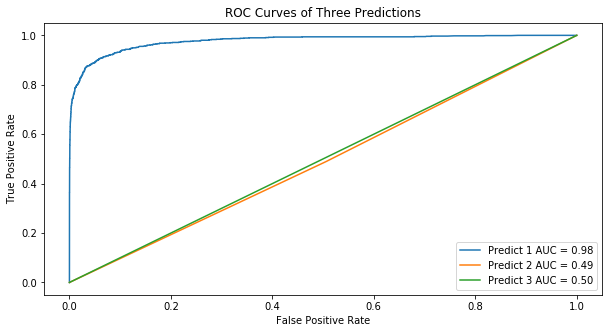

In [41]:
plt.figure(figsize=(10,5))
f = 1
for yhat in predicts:
    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'Predict %.d AUC = %0.2f' % (f,auc))
    f +=1
plt.title('ROC Curves of Three Predictions')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
Precision-Recall Curve for predictions of three models:

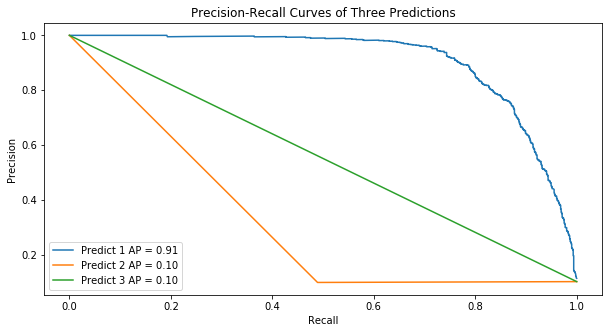

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
plt.figure(figsize=(10,5))
f2 = 1
for yhat in predicts:
    precision, recall, _ = precision_recall_curve(y_test, yhat)
    average_precision = average_precision_score(y_test, yhat)
    plt.plot(recall, precision, label = 'Predict %.d AP = %.2f' % (f2, average_precision))
    f2 +=1
plt.title('Precision-Recall Curves of Three Predictions')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#### Model Performance:

From the cross validation we can find that my model is performing well on my validation data with an accuracy around 97%, so we can use it on our test data.

From the roc curves for my classifier, a classifier that randomly guesses the class and a classifier that guesses that all examples are NOT 3's we can find that the auc for the random classifier and all-3 classifier is close at around 0.50, while my classifier way outperformed and has an auc of 0.98.

From the Prrecision-Recall curve we can observe that my classifier is still doing a great job and has an AP of 0.91, while other two classifiers has 0.1 APs.

(f)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
clf = LogisticRegression(penalty= 'l1', C = 0.00011, random_state=0).fit(x_train_2d, y_train)

NameError: name 'x_train_2d' is not defined

In [2]:
%%time
folds = 10
skf = SKF(n_splits= folds, shuffle=True, random_state= 409)
skf.get_n_splits(x_train_2d, y_train) 
f = 0
lgprediction = np.empty(y_train.shape[0],dtype='object')
for train_index, valid_index in skf.split(x_train_2d, y_train):
    X_train1, X_valid1 =x_train_2d[train_index], x_train_2d[valid_index]
    y_train1, y_valid1 = y_train[train_index], y_train[valid_index]
    clf = LogisticRegression(penalty= 'l1', C = 1.01902453e-05, random_state=0, 
                             solver='liblinear').fit(X_train1, y_train1)
    yhat1 = clf.predict(X_valid1)
    yhat1 = np.where(yhat1 >= 0.5, 1, 0)
    lgprediction[valid_index] = yhat1         

NameError: name 'SKF' is not defined

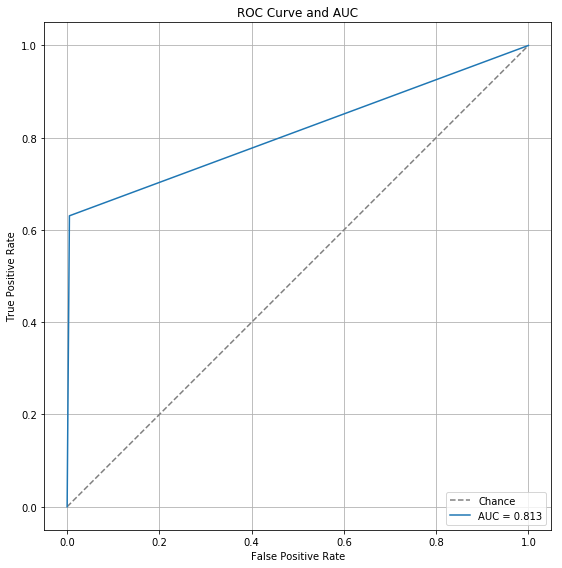

In [139]:
plot_roc(y_train, lgprediction)

Through cross validation above we can see our model is doing a great job and the it has an 81.3\% accuracy on validation data.

In [35]:
%%time
from sklearn.svm import l1_min_c
nonzerol, costl, f1l, aucl =[],[],[],[]
C = l1_min_c(x_train_2d, y_train, loss='log')* np.logspace(0, 7, 16)
for c in C:
    clf = LogisticRegression(penalty= 'l1', C = c, random_state=0, solver='liblinear').fit(x_train_2d, y_train)
    yhat1 = clf.predict(x_test_2d)
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, yhat1, pos_label=1)
    auc1 = metrics.auc(fpr1, tpr1)
    aucl.append(auc1)
    
    nonzero = clf.coef_[clf.coef_!=0].shape[0]
    nonzerol.append(nonzero)

    coef_new = np.hstack((np.ones(shape=(len(clf.coef_),1)),clf.coef_))
    cost = costFunction(coef_new.ravel(), x_train_2d, y_train)
    costl.append(cost)                
                        
    yhat1 = np.where(yhat1 >= 0.5, 1, 0)
    f1 = f1_score(y_test, yhat1, average='macro') 
    f1l.append(f1)

CPU times: user 1min 15s, sys: 9.27 s, total: 1min 24s
Wall time: 1min 15s


No handles with labels found to put in legend.


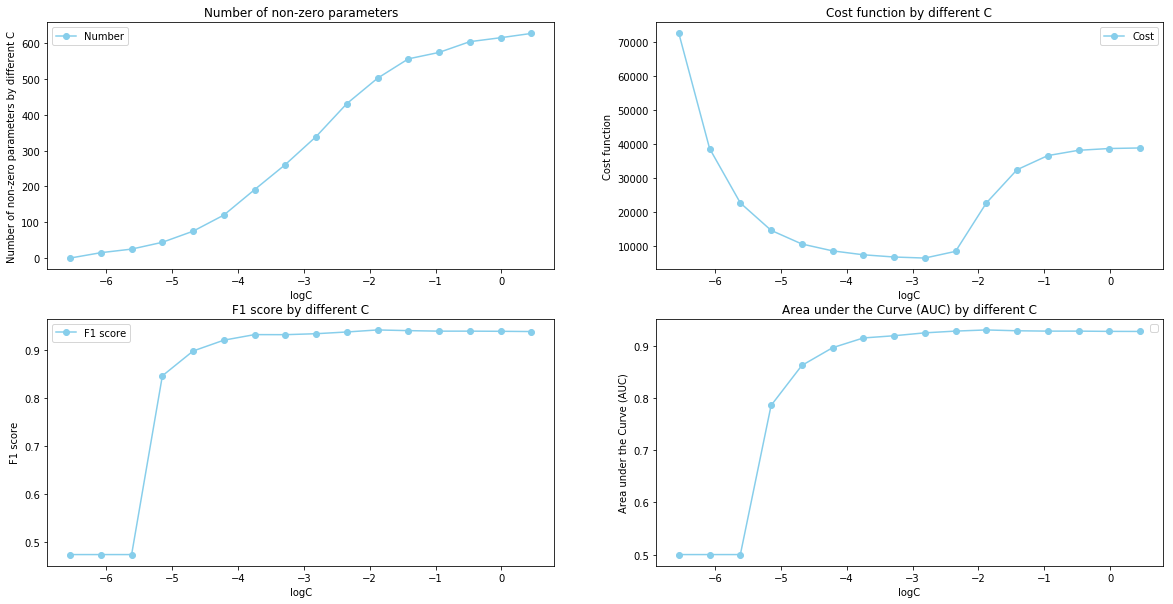

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(np.log10(C),nonzerol, marker = 'o', color = 'skyblue', label ='Number')
plt.xlabel('logC')
plt.ylabel('Number of non-zero parameters by different C')
plt.title('Number of non-zero parameters')
plt.legend()

plt.subplot(2,2,2)
plt.plot(np.log10(C),costl, marker = 'o', color = 'skyblue',label='Cost')
plt.xlabel('logC')
plt.ylabel('Cost function')
plt.title('Cost function by different C')
plt.legend()

plt.subplot(2,2,3)
plt.plot(np.log10(C),f1l, marker = 'o', color = 'skyblue',label='F1 score')
plt.xlabel('logC')
plt.ylabel('F1 score')
plt.title('F1 score by different C')
plt.legend()

plt.subplot(2,2,4)
plt.plot(np.log10(C),aucl, marker = 'o', color = 'skyblue')
plt.xlabel('logC')
plt.ylabel('Area under the Curve (AUC)')
plt.title('Area under the Curve (AUC) by different C')
plt.legend()

Implications:

As log C grows up, regularization strength goes down and the effect of regularization goes up, at the same time:

1) The number of non zero parameters goes up and variance also goes up.

2) Cost function goes down and than goes up when logC is about -1.

3) F1 score goes up.

4) Area under the curve goes up.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

(a)

I am interested in what affects tip percentage of Green taxi passengers in NYC September 2015. It is an attracting problem because if we know the factors to influence tip percentage, we can find a way to increase income of taxi drivers.

(b)

In [93]:
#loading data
data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv') 

In [94]:
#Drop the column Ehail_fee as all values are missing in this column
data = data.drop(columns = 'Ehail_fee')
#Drop na
data = data.dropna()
#All the fare, tax, tip, toll, surcharge should be above zero, drop the records where are unreasonable negative values
data = data[(data.Fare_amount >= 0) & (data.Extra >= 0) 
            & (data.MTA_tax >= 0) & (data.Tip_amount >= 0) 
            & (data.Tolls_amount >= 0) &  (data.improvement_surcharge >= 0)
            & (data.Total_amount >= 2.5)]
#For the last filer 'data.Total_amount >= 2.5', it is because the initial charge of Green Taxi in NYC is $2.5

In [95]:
#Calculate the mean of trip distances
mean = data.Trip_distance.mean() 
#Calculate the standard deviation of trip distances
std = data.Trip_distance.std() 
#Define a new dataset without outliers that are 3 std away from mean
data_no_outlier = data.Trip_distance[abs(data.Trip_distance-mean)/std <= 3] 

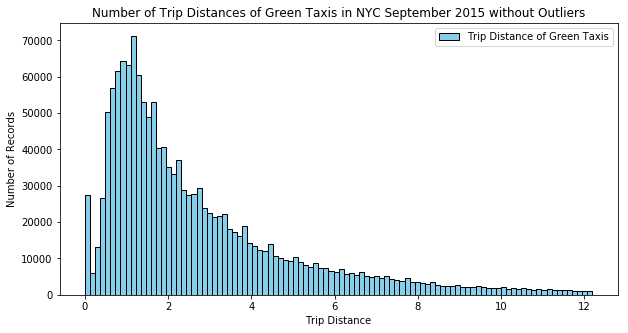

In [96]:
#Set figure size
plt.figure(figsize=(10,5)) 
#Plot histogram of trip distance data without outliers
plt.hist(data_no_outlier,bins = 100,label = 'Trip Distance of Green Taxis', color = "skyblue",edgecolor='black') 
#Set x label
plt.xlabel('Trip Distance') 
#Set y label
plt.ylabel('Number of Records') 
#Set title
plt.title('Number of Trip Distances of Green Taxis in NYC September 2015 without Outliers') 
#Show legend
plt.legend() 
plt.show()

##### Structures:

1) From the histogram above, we can notice the distribution of trip distances of Green Taxis in NYC September 2015 is right-skewed, which means the mean is greater than the median. 

2) As we eliminated the outliers, it can be concluded that most trip distances appear between 0 to 12 miles with top trip distances within 0 and 2 miles. The number of trip distances decreases steadily as distance increase after 1 mile.

##### Hypothesis:

1) The right-skewed, bell-shaped trip distance curve seems to follow some distribution rather than random as it is not symmetric. 

2) As most trip distances are rather short, people might use green caps most to catch up the time rather then travel far.

##### Recommendations:

1) Take a look at the trips with distance less than 3 miles, their pick-up place, drop place and pick-up time. This can be useful to see if these trips appear within a certain range of time and locations, which can be further used in taxi allocations.


There are two datetime columns in the raw data, "lpep_pickup_datetime" and "Lpep_dropoff_datetime" which represent the picking up and dropping time of the Green taxis. Here we choose picking up hour as the hour for each trip distance. First, we need to convert the data type of "lpep_pickup_datetime" into datetime and extract hours.

In [97]:
#Create a column for pickup datetime
data['pickup_datetime'] = pd.to_datetime(data.lpep_pickup_datetime) 
#Create a column for pickup hour
data['pickup_hour'] = data.pickup_datetime.dt.hour 

In [98]:
#Calculate mean trip distance grouped by hour of day
mean_by_hour = data.Trip_distance.groupby(by = data.pickup_hour).mean() 
#Calculate median trip distance grouped by hour of day
median_by_hour = data.Trip_distance.groupby(by = data.pickup_hour).median() 
#Combine mean and median of each hour of day into one dataframe
mean_median = pd.concat([mean_by_hour.rename('Mean'),median_by_hour.rename('Median')], 
                        axis =1, names = ['Mean', 'Median'],)
#Reset the index of the dataframe
mean_median.index.names = ['Hour of day']
#Output the dataframe of mean and median
mean_median

,Mean,Median
Hour of day,,
0,3.121554,2.200
1,3.023154,2.130
2,3.053454,2.150
3,3.218797,2.210
4,3.533137,2.370
5,4.140764,2.900
6,4.065130,2.850
7,3.289561,2.180
8,3.049691,1.980


Next, let's plot the mean and median trip distance by hour of day.

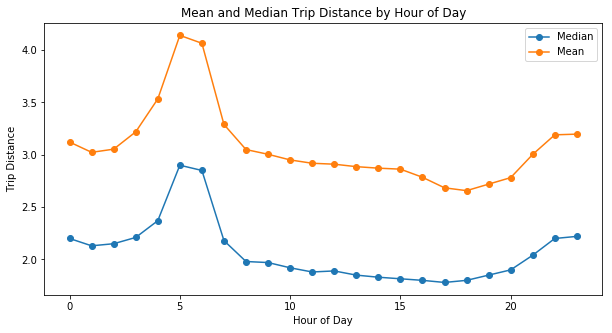

In [99]:
plt.figure(figsize= (10,5))
#Plot median trip distance by hour of day
plt.plot(mean_median.Median, marker='o', label = 'Median')
#Plot mean trip distance by hour of day
plt.plot(mean_median.Mean, marker='o', label = 'Mean')
#Set x label
plt.xlabel('Hour of Day')
#Set y label
plt.ylabel('Trip Distance')
#Set title
plt.title('Mean and Median Trip Distance by Hour of Day')
#Show legend
plt.legend()
plt.show()

##### Structures:

1) We can find that there are lots of long trip distances between 5am and 6am, with the largest mean of trip distance 4.14 miles and largest median of of trip distance 2.90 miles appearing at 5am. This is the time most people go to work in the morning.

2) Also, it is interesting that trip distances in the evening hours, which should be the time people go back home, are relatively short. 

3) Mean is larger than median at each hour of day, this is consistent to the right-skewed distribution of trip distance we observed in Question 2.

##### Hypotheses:

1) Most people start morning commuting between 4am to 6am and start evening commuting after 8pm.

2) People travel more long distances in the mornings than in the evening. It might be that people hurry in the morning in order to be on time they take a taxi, while in the evening they are not in hurry of getting home so they use taxi less. 

3) People might be using other transportations in the evening more to save money.

##### Recommendations:

1) Locate pick-up places of trips in morning commuting hours, allocate more green caps in those locations in the morning.

2) Locate drop-off places of trips in evening commuting hours, also allocate more green caps in those locations in the morning.

In [100]:
#Create a new variable for tip as a percentage of tha total fare
data['Tip_percentage'] = data.Tip_amount/data.Total_amount

In order to build a predictive model for tip as a percentage of the total fare, we need to explore the relationships of tip and other variables to decide what features to include in the model.

First, let's calculate the correlations between Tip_percentage and other variables.

In [101]:
#Calculate the correlations between all the variables
corr = data.corr()
corr

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup_hour,Tip_percentage
VendorID,1.000000,0.015736,-0.019260,0.021813,-0.036267,0.038576,0.082219,0.003973,0.008000,0.008745,-0.013496,-0.008556,0.005002,-0.007457,0.005717,-0.034877,0.015843,0.014451,-0.008171
RateCodeID,0.015736,1.000000,0.079693,-0.073914,0.010062,-0.004032,-0.002438,0.051772,0.162489,-0.141513,-0.965503,0.006319,0.043811,-0.941537,0.132377,0.024018,0.957791,-0.021940,-0.057999
Pickup_longitude,-0.019260,0.079693,1.000000,-0.998914,0.178383,-0.177260,-0.004907,-0.016405,0.005471,-0.011941,-0.079105,0.004340,-0.003462,-0.077517,0.004261,-0.004281,0.080461,-0.005091,-0.001052
Pickup_latitude,0.021813,-0.073914,-0.998914,1.000000,-0.177974,0.178789,0.003811,0.014528,-0.007998,0.009073,0.073567,-0.009706,0.005390,0.072072,-0.007601,0.010621,-0.074888,0.004490,-0.006532
Dropoff_longitude,-0.036267,0.010062,0.178383,-0.177974,1.000000,-0.998745,-0.002813,-0.008985,0.008239,-0.002472,-0.010120,-0.010138,0.002897,-0.011634,0.005065,0.019750,-0.002667,-0.002697,-0.016834
Dropoff_latitude,0.038576,-0.004032,-0.177260,0.178789,-0.998745,1.000000,0.001761,0.006063,-0.011856,-0.000159,0.004552,0.003785,-0.002321,0.005887,-0.009665,-0.012105,0.008537,0.001779,0.008116
Passenger_count,0.082219,-0.002438,-0.004907,0.003811,-0.002813,0.001761,1.000000,0.012169,0.011732,0.019479,0.002841,0.004590,0.007845,0.003493,0.012466,-0.000624,-0.003135,0.009598,0.001349
Trip_distance,0.003973,0.051772,-0.016405,0.014528,-0.008985,0.006063,0.012169,1.000000,0.851954,-0.040476,-0.032378,0.390521,0.320736,-0.017416,0.849155,-0.141573,0.017823,-0.033902,0.095084
Fare_amount,0.008000,0.162489,0.005471,-0.007998,0.008239,-0.011856,0.011732,0.851954,1.000000,-0.063283,-0.134477,0.400605,0.285536,-0.113472,0.975878,-0.143365,0.115221,-0.019523,0.083182
Extra,0.008745,-0.141513,-0.011941,0.009073,-0.002472,-0.000159,0.019479,-0.040476,-0.063283,1.000000,0.134841,-0.009746,-0.033983,0.133666,-0.026631,-0.008305,-0.135331,0.254087,0.011649


It is hard to see the patterns with a glance at the above correlation chart, let's make a heatmap to see the patterns.

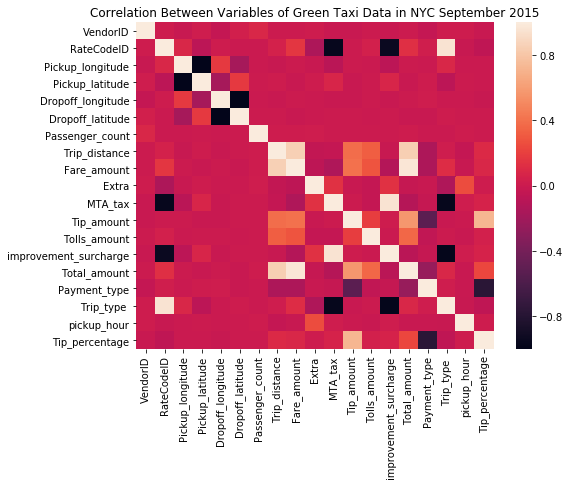

In [102]:
import seaborn as sns
#Set figure size
plt.figure(figsize = (8,6))
#Plot the heatmap of the correlations
sns.heatmap(corr)
#Set title
plt.title('Correlation Between Variables of Green Taxi Data in NYC September 2015')
plt.show()

It is shown above that Tip_percentage has a strong correlation with Payment_type. Let's make a plot to see it more clearly.

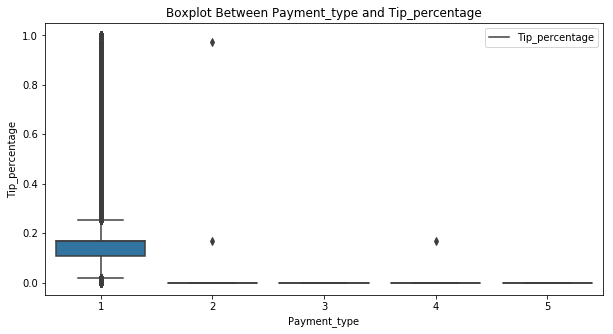

In [103]:
#Set figure size
plt.figure(figsize = (10,5))
#Make a boxplot between Payment_type and Tip_percentage
sns.boxplot(x='Payment_type', y='Tip_percentage', 
            data=data).set_title("Boxplot Between Payment_type and Tip_percentage")
#Set legend
plt.legend(['Tip_percentage'])
plt.show()

##### Structures:

1) We can see from the above boxplot that only when Payment_type is 1 Credit card that drivers get tips. 

2) The median of tip percentage for credit card payment is 0.167.

##### Hypotheses:

It is not reasonable that drivers only get tips when passengers pay by credit cards. From the data dictionary we can discover that the variable "Total_amount" is "The total amount charged to passengers. Does not include cash tips". As tips by cash are not included in Total_amount, so we can only see tip percentage for credit cards from the above boxplot.

<br>

As it seems that whether trips originate or terminate at one of the NYC area airports affects fare, we are interested in whether it also has relationships with Tip_percentage. Let's see if Tip percentage at each hour of day are different for airport and non-airport transactions.

In [104]:
#Create a new variable that indicates whether the trip originates or terminates at one of the NYC area airports
data['airport'] = np.where((data.RateCodeID == 2)|(data.RateCodeID == 3), 1, 0)

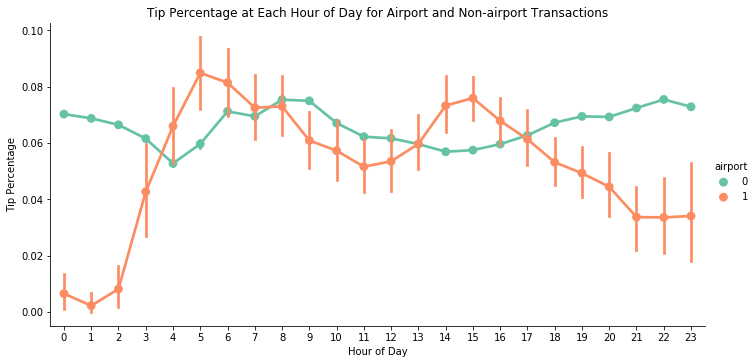

In [107]:
import seaborn as sns
#Make a factorplot between Tip_percentage and pickup_hour for both airport and non-airport transactions
g = sns.factorplot(x  = 'pickup_hour', y = 'Tip_percentage', hue = 'airport', 
                   data= data,size = 5, aspect= 2, palette = 'Set2')
#Set title
plt.title('Tip Percentage at Each Hour of Day for Airport and Non-airport Transactions')
#Set x label
plt.xlabel('Hour of Day')
#Set y label
plt.ylabel('Tip Percentage')
plt.show()

##### Structures:
1) For non-airport transactions, tip percentage is stable at each hour of day.

2) For airport transactions, tip percentage is much lower than non-airport transactions from 9pm to 2am but is almost at same level with non-airport transactions from 4am to 5pm, which is evening time.

##### Hypotheses:
1) There might be an interaction between whether the trip is an airport transaction and hour of day when predicting tip percentages.

2) People travel from or to airports might be more tired in the evening and tend to give less tips.

##### Recommendations:
1) Maybe also look at tip percentage by the day of week to see if there is difference between tip percentage and weekdays or weekends.

(c)

Target variable: tip percentage in each trip

Available predictors: ['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime','Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude','Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax','Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type ', 'pickup_datetime', 'pickup_hour', 'Tip_percentage', 'airport', 'Tip_or_not', 'fStore_and_fwd_flag']

The data cleaning process is done in (b). There are a lot of negative values for variables that can not be negative and there are missing data.

(d)

From the plot below I can see there are reasonbale numbers for the two class "tip" and "no tip". So I decided to use a random forest model to classifiy whether people tip or not.

In [17]:
with_tip = data[data.Tip_amount != 0]

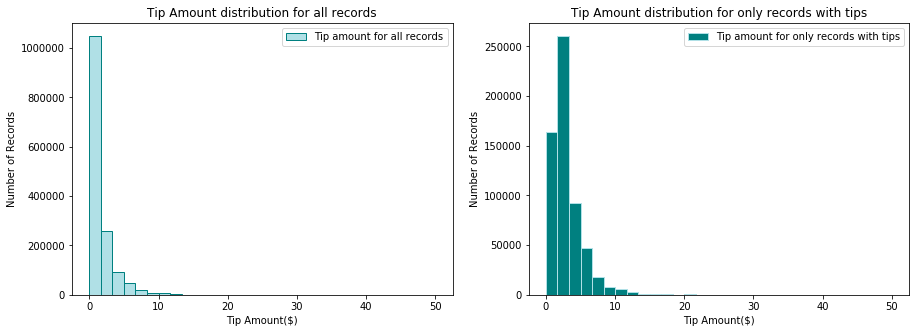

In [18]:
fig, ax = plt.subplots(1,2 ,figsize=(15,5))
ax[0].hist(data.Tip_amount, bins =30, range = (0,50), label ='Tip amount for all records', 
           color = 'powderblue', edgecolor='teal')
ax[1].hist(with_tip.Tip_amount, bins =30, range = (0,50),label ='Tip amount for only records with tips',
           color ='teal', edgecolor='powderblue')
ax[0].set_title('Tip Amount distribution for all records')
ax[0].set_xlabel('Tip Amount($)')
ax[0].set_ylabel('Number of Records')
ax[1].set_title('Tip Amount distribution for only records with tips')
ax[1].set_xlabel('Tip Amount($)')
ax[1].set_ylabel('Number of Records')
ax[0].legend()
ax[1].legend()
plt.show()

It appears that the distributions of tip amount for all records and only records with tips are similar, while the number of records for records with tips is about 1/4 of the number of records for all records. Therefore I make a new binary variable indicating whether there is tip and build a random forest model on the binary tip variable.

(e)

Using ROC curve to evaluate performance to see if I succeeded.

(f)

Before splitting our training and test data, let's make some transformation of our data to make it feasible for a random forest model.

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold as SKF
import statsmodels.stats as stats
from sklearn.preprocessing import OneHotEncoder
#Make a copy of raw data
X_rf = data.copy()
#Create a new variable where tip is 1 is there is tip and is 0 if there is no tip
X_rf['Tip_or_not'] = np.where(X_rf.Tip_amount ==0, 0, 1)
#Create target that is the new variable
y_rf= X_rf['Tip_or_not']

In [27]:
#Build a label encoder
le = preprocessing.LabelEncoder()
#Transform string factors 'Y' and 'N' in Store_and_fwd_flag into number factors
X_rf['fStore_and_fwd_flag'] = le.fit_transform(X_rf['Store_and_fwd_flag'])

In [28]:
#Build a label encoder
le = preprocessing.LabelEncoder()
#Transform string factors 'Y' and 'N' in Store_and_fwd_flag into number factors
X_rf['fStore_and_fwd_flag'] = le.fit_transform(X_rf['Store_and_fwd_flag'])

As total amount does not include cash tips, the variable Payment_type itself can predict whether people give out tips. To prevent overfitting, we need to delete this variable when fitting the random forest model.

In [30]:
#Drop the column Tip_percentage and store the rest as the predictors X
X_rf_dropped = X_rf.drop(columns = ['Payment_type', 'Store_and_fwd_flag', 'Tip_percentage',
                                     'RateCodeID','VendorID','lpep_pickup_datetime',
                                     'Lpep_dropoff_datetime','pickup_datetime', 'Tip_amount', 
                                    'Trip_type ','Tip_or_not','Payment_type'])

#Use only the column Tip_percentage as the response variable y
y_rf_dropped = y_rf

In [31]:
#Build an one hot encoder to parse categorical variables so that they can be used in random forest model
ohe = OneHotEncoder()
#dPayment_type = pd.DataFrame(ohe.fit_transform(X_rf.Payment_type.values.reshape(-1,1)).toarray(), 
#                                   columns = ["Payment_type1", "Payment_type2", "Payment_type3", 
#                                        "Payment_type4", "Payment_type5"])
dStore_and_fwd_flag = pd.DataFrame(ohe.fit_transform(X_rf.fStore_and_fwd_flag.values.reshape(-1,1)).toarray(), 
                                   columns = ["Store_and_fwd_flag1", "Store_and_fwd_flag2"])
dRateCodeID = pd.DataFrame(ohe.fit_transform(X_rf.RateCodeID.values.reshape(-1,1)).toarray(), columns = ["RateCodeID1", 
                                        "RateCodeID2", "RateCodeID3", "RateCodeID4", "RateCodeID5", "RateCodeID6"])
dairport = pd.DataFrame(ohe.fit_transform(X_rf.airport.values.reshape(-1,1)).toarray(), 
                                   columns = ["airport1", "airport2"])
dTrip_type = pd.DataFrame(ohe.fit_transform(X_rf['Trip_type '].values.reshape(-1,1)).toarray(), 
                                   columns = ["Trip_type1", "Trip_type2"])
#Reset index before combining two dataframes
X_rf_dropped.reset_index(drop=True, inplace=True)
#Combining two dataframes
X_rf_dropped = pd.concat([X_rf_dropped, dStore_and_fwd_flag, dRateCodeID, 
                                dairport, dTrip_type], axis = 1)

In [33]:
from sklearn.model_selection import train_test_split
#Splite the raw data into training and test data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf_dropped, y_rf_dropped, 
                                                                test_size=0.3, random_state=409)

(g)

Take a look at the importance of variables in the data.

In [37]:
#Build a random forest model
from sklearn.metrics import roc_auc_score
rFmodel =  RandomForestRegressor(n_estimators = 100 , oob_score = True, 
                                 random_state = 42,max_depth = 5, min_samples_split = 2)
#Fit the random forest model
rFmodel.fit(X_train_rf, y_train_rf)
#Print out the acu for our random forest model
print("AUC - ROC : ", roc_auc_score(y_train_rf, rFmodel.oob_prediction_))

AUC - ROC :  0.8994823577228002


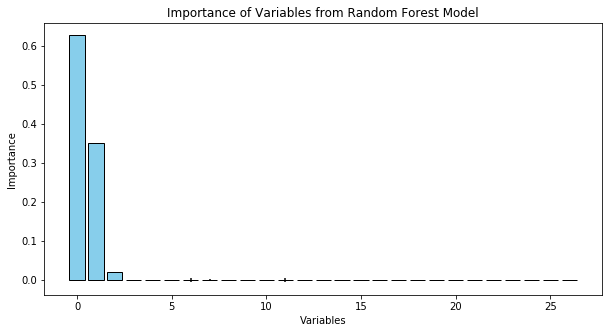

In [38]:
#Get the variable importance for the random forest model
importance = rFmodel.feature_importances_
#Store the importance into a pandas dataframe
importance = pd.DataFrame(rFmodel.feature_importances_,index = X_train_rf.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
#Calculate the standard deviatoins of the importance
importance["Std"] = np.std([tree.feature_importances_
                            for tree in rFmodel.estimators_], axis=0)
# Plot the feature importances of the forest
x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]
#Set figure size
plt.figure(figsize= (10,5))
#Make a bar plot
plt.bar(x, y, yerr=yerr, align="center", color = 'skyblue' ,edgecolor='black')
#Set title
plt.title('Importance of Variables from Random Forest Model')
#Set x label
plt.xlabel('Variables')
#Set y label
plt.ylabel('Importance')
plt.show()

In [39]:
#Have a look at the importance metrics
importance

,importance,Std
Total_amount,6.268735e-01,0.000000e+00
Fare_amount,3.503237e-01,0.000000e+00
Extra,2.197528e-02,0.000000e+00
Tolls_amount,8.179508e-04,1.984710e-07
Trip_distance,9.484446e-06,6.830309e-07
Passenger_count,8.942349e-08,4.045266e-06
Dropoff_latitude,1.994709e-08,5.369704e-03
Pickup_longitude,0.000000e+00,2.533341e-03
RateCodeID6,0.000000e+00,0.000000e+00
RateCodeID3,0.000000e+00,9.884215e-05


In [40]:
#Make predictions with the final random forest model on test data
roc_auc_score(y_test_rf, rFmodel.predict(X_test_rf))

0.8992922532997571

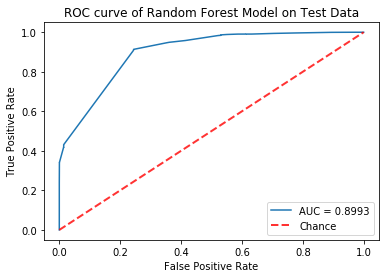

In [42]:
from sklearn import metrics
#Calculate the false positive rate, true positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_rf, rFmodel.predict(X_test_rf), pos_label=1)
#Build auc metrics
auc2 = metrics.auc(fpr2, tpr2)
#Plot roc curve
plt.plot(fpr2, tpr2, label = 'AUC = %0.4f' % (auc2))
#Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
#Set x label
plt.xlabel('False Positive Rate')
#Set y label
plt.ylabel('True Positive Rate')
#Set title
plt.title('ROC curve of Random Forest Model on Test Data')
#Set legend
plt.legend(loc = 4)

(h)

#### Random Forest Model Interpretation

* The random forest model outperformed linear regression model with an accuracy of 89.93%.
<br>

* Total_amount is the most important variable according to the importance metrics, this might because of that total amount means longer distance and longer time that the passenger spend with the driver. People tend to give tips when they stay long and talk more to the driver.
<br>

* The main purpose of random forest model is to predict so this model is doing a nice job.

#### Improvement:

If I have more timeFind optimized hyperparameters of random forest model. Use K fold cross validation to evaluate my model after splitting my training data into training and validation data.

(i)

#### Executive Summary

This report provides an analysis and evaluation of Green taxis in NYC of September 2015. Methods of analysis include exploratory data analysis and random forest. Results of data analyzed show there is a big difference in distance and fare between taxi trips originate or terminate from airports and trips that do not. The place people get on and get off the taxi seems to be an influence factor on whether they give tips or not. Also people use Green taxis differently in different hours of the day for different purposes. Total trip amount and Trip distance has a significant impact on whether people give tips. 

The report finds a great potential of increasing the efficiency of Green taxi usage and income. Recommendations discussed include:
* Allocate Green taxis more in airports than in downtown in daytime
* Allocate Green taxis more at places people go to work from in the mornings than in the evenings
* To increase income and efficiency, it is worthwhile to allocate Green taxis to airports when taxi needs in downtown is low
* Traveling Longer trip distance and spending more time staying with the driver results in higher probability of tipping

The report also investigates the fact that the analysis conducted has limitations. If given more time, I will also conduct the following:
* Explore relationships between tip percentage and day of week
* Find optimized hyperparameters of random forest model. Use K fold cross validation to evaluate my model after splitting my training data into training and validation data.
* Build a logistic regression on whether people give out tips and compare with the random forest model